# Import

In [54]:
from random import randint, random
from timeit import Timer
import numbers, math, timeit, random

import time
from datetime import timedelta
from matplotlib import style
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

# Konstanten

In [55]:
liste = ["ARIEL", "ELLA", "INGA", "KATHARINA", "LENA", "LINUS", "MARKUS", "MARTIN", "SOPHIE", "TIM"] #unser "Telefonbuch"
suche = "TIM" # Der Namen den wir suchen
n = [5, 10, 25, 50, 75, 100, 250, 500, 1000, 2500, 5000, 10000, 50000, 100000]

### Lineare suche

In [56]:
def linearesuche(liste,suche):
    for n,i in enumerate(liste):
        if i == suche:
            print(f"\nGesuchter Namer befindet sich an Position {n}")
            return n
    return -1

In [57]:
linearesuche = linearesuche(liste,suche)

if linearesuche == -1:
    print(f"Name {suche} ist nicht im Telefonbuch")


Gesuchter Namer befindet sich an Position 9


### Binäre Suche

In [58]:
def binaeresuche(liste, suche):
    links = 0
    rechts = len(liste) - 1
 
    while links <= rechts:
        mitte = (rechts + links) // 2
        
        if liste[mitte] < suche:
            links = mitte + 1
   
        elif liste[mitte] > suche:
            rechts = mitte - 1
            
        else:
            return mitte
    return -1

In [59]:
binaeresuche = binaeresuche(liste,suche)

In [60]:
if binaeresuche != -1:
    print(f"\nGesuchter Namer befindet sich an Position {str(binaeresuche)}")
else:
    print(f"Name {suche} ist nicht im Telefonbuch")


Gesuchter Namer befindet sich an Position 9


## Benchmark

In [61]:
liste = sorted([randint(0,10) for i in range(20)])
liste = list(range(0, 1000))
suche = 923

In [69]:
def linearesuche(data, value):
    for n, i in enumerate(data):
        if i == value:
            #print(f"gefunden an Position {n} ")
            print(f"Index: {n}, gesuchter Wert: {value}")
            return n
    return -1

In [70]:
def binaeresuche(data, value):
    l = 0
    r = len(data) - 1
 
    while l <= r:
        mitte = (r + l) // 2
        
        if data[mitte] < value:
            l = mitte + 1
   
        elif data[mitte] > value:
            r = mitte - 1
            
        else:
            print(f"Index: {mitte}, gesuchter Wert: {value}")
            return mitte
    return -1

In [71]:
print(binaeresuche(liste,suche))
print(linearesuche(liste,suche))

Index: 923, gesuchter Wert: 923
923
Index: 923, gesuchter Wert: 923
923


### Point Klasse

In [72]:
# Die Klasse müsst ihr nicht anrühren
class Point(object):
    def __init__(self, x, y):
        if isinstance(x, numbers.Number):
            self.x = x
        else:
            raise TypeError("x must be a number")

        if isinstance(y, numbers.Number):
            self.y = y
        else:
            raise TypeError("y must be a number")

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    @x.setter
    def x(self, x):
        if isinstance(x, numbers.Number):
            self._x = x
        else:
            raise TypeError("X muss eine Zahl sein")

    @y.setter
    def y(self, y):
        if isinstance(y, numbers.Number):
            self._y = y
        else:
            raise TypeError("Y muss eine Zahl sein")
    
    def distance(self, other):
        if isinstance(other, Point):
            return math.sqrt(((x - other.x) ** 2) + ((y - other.y) ** 2))
        else:
            raise TypeError("Distanzen können nur zwischen Punkten berechnet werden")
    
    def area(self):
        return 0
    
    def __eq__(self, other):
        if (self.x == other.x and self.y == other.y):
            return True
        return False
    
    def __lt__(self, other):
        if (self.x < other.x):
            return True
        elif (self.x == other.x and self.y < other.y):
            return True
        return False
        
    def __gt__(self, other):
        if (self.x > other.x):
            return True
        elif (self.x == other.x and self.y > other.y):
            return True
        return False

### Liste mit allen Liste der größe n

In [73]:
list_of_lists = []
for i in n:
    new_list = sorted(
    [(Point(randint(-5000,5000), randint(-5000,5000)).x, Point(randint(-5000,5000), randint(-5000,5000)).y) for j in range(i)])
    list_of_lists.append(new_list)

### Teil 3 - 1x suchen

In [74]:
linearesuche(list_of_lists[-1], random.choice(list_of_lists[-1]))

Index: 62972, gesuchter Wert: (1313, 4614)


62972

In [75]:
binaeresuche(list_of_lists[-1], random.choice(list_of_lists[-1]))

Index: 6759, gesuchter Wert: (-4323, 2725)


6759

### Teil 4 - 10x Suchen

In [76]:
%%time
for i in range(10):
    start_time = time.monotonic()
    linearesuche(list_of_lists[-1], random.choice(list_of_lists[-1]))
    end_time = time.monotonic()
    print(timedelta(milliseconds=end_time - start_time))

Index: 27993, gesuchter Wert: (-2195, -2938)
0:00:00.000016
Index: 75478, gesuchter Wert: (2547, 4519)
0:00:00
Index: 10214, gesuchter Wert: (-3979, -2935)
0:00:00
Index: 38379, gesuchter Wert: (-1157, -782)
0:00:00.000015
Index: 40561, gesuchter Wert: (-945, 4145)
0:00:00
Index: 19312, gesuchter Wert: (-3066, 1120)
0:00:00
Index: 95682, gesuchter Wert: (4572, -1982)
0:00:00.000016
Index: 25983, gesuchter Wert: (-2403, 3944)
0:00:00
Index: 42661, gesuchter Wert: (-733, -4427)
0:00:00
Index: 2482, gesuchter Wert: (-4749, -4002)
0:00:00
Wall time: 45.9 ms


In [77]:
%%time
for i in range(10):
    start_time = time.monotonic()
    binaeresuche(list_of_lists[-1], random.choice(list_of_lists[-1]))
    end_time = time.monotonic()
    print(timedelta(milliseconds=end_time - start_time))

Index: 79217, gesuchter Wert: (2914, -1427)
0:00:00
Index: 10685, gesuchter Wert: (-3933, 3703)
0:00:00
Index: 88906, gesuchter Wert: (3881, 1414)
0:00:00
Index: 50307, gesuchter Wert: (24, 3606)
0:00:00
Index: 99858, gesuchter Wert: (4987, -298)
0:00:00
Index: 74179, gesuchter Wert: (2420, 1163)
0:00:00
Index: 94977, gesuchter Wert: (4498, 4172)
0:00:00
Index: 70960, gesuchter Wert: (2105, 3870)
0:00:00
Index: 82212, gesuchter Wert: (3211, -3367)
0:00:00
Index: 6489, gesuchter Wert: (-4350, 4695)
0:00:00
Wall time: 0 ns


### Teil 5

In [78]:
zeit_liear = []
for j in list_of_lists:
    for i in range(10):
        begin = time.time()
        linearesuche(j, random.choice(j))
        end = time.time()
        zeit_liear.append(end - begin)
        
zeit_b = []
for j in list_of_lists:
    for i in range(10):
        begin = time.time()
        binaeresuche(j, random.choice(j))
        end = time.time()
        zeit_b.append(end - begin)

Index: 3, gesuchter Wert: (1323, -4936)
Index: 1, gesuchter Wert: (-3359, 3905)
Index: 4, gesuchter Wert: (4974, -142)
Index: 0, gesuchter Wert: (-4595, 4303)
Index: 4, gesuchter Wert: (4974, -142)
Index: 0, gesuchter Wert: (-4595, 4303)
Index: 0, gesuchter Wert: (-4595, 4303)
Index: 2, gesuchter Wert: (1222, 1830)
Index: 4, gesuchter Wert: (4974, -142)
Index: 2, gesuchter Wert: (1222, 1830)
Index: 9, gesuchter Wert: (3598, 187)
Index: 5, gesuchter Wert: (-920, -1423)
Index: 3, gesuchter Wert: (-1502, -2417)
Index: 6, gesuchter Wert: (855, 3671)
Index: 4, gesuchter Wert: (-1431, -1541)
Index: 3, gesuchter Wert: (-1502, -2417)
Index: 5, gesuchter Wert: (-920, -1423)
Index: 8, gesuchter Wert: (1266, -4803)
Index: 5, gesuchter Wert: (-920, -1423)
Index: 1, gesuchter Wert: (-2973, 3687)
Index: 17, gesuchter Wert: (3266, 4011)
Index: 18, gesuchter Wert: (3488, -2113)
Index: 8, gesuchter Wert: (-614, -4897)
Index: 2, gesuchter Wert: (-4608, 733)
Index: 8, gesuchter Wert: (-614, -4897)
Index:

In [79]:
ticks = []
for i in range(len(n)):
    ticks.append('listen_'+ str(i))

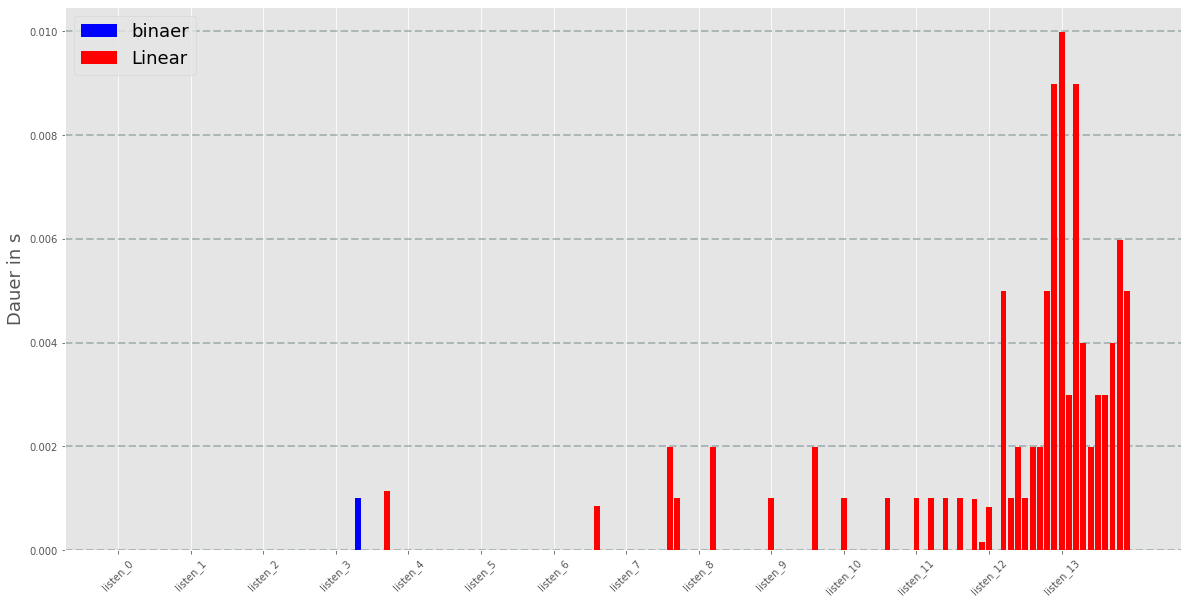

In [80]:
plt.figure (figsize=(20,10))
plt.bar([i for i in range(len(zeit_b))],zeit_b, color='b', linewidth=3, label='binaer')
plt.bar([i for i in range(len(zeit_liear))],zeit_liear, color='red', label='Linear')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(range(0,140,10), ticks[:14],rotation=45)
#plt.xlabel('Zeit',fontsize=18)
plt.ylabel('Dauer in s',fontsize=18)
plt.legend(fontsize=18)
plt.show()

# Mit einer viel größeren Liste

In [81]:
%%time
liste_spezial = sorted([(Point(randint(-5000,5000), randint(-5000,5000)).x, Point(randint(-5000,5000), randint(-5000,5000)).y) for i in range(10**7)])

Wall time: 1min 27s


In [82]:
zeit_linear = []
for i in range(10):
    begin = time.time()
    linearesuche(liste_spezial, random.choice(liste_spezial))
    end = time.time()
    zeit_linear.append(end - begin)
        
zeit_b2 = []
for i in range(10):
    begin = time.time()
    binaeresuche(liste_spezial, random.choice(liste_spezial))
    end = time.time()
    zeit_b2.append(end - begin)

Index: 2457221, gesuchter Wert: (-2541, -3492)
Index: 1945514, gesuchter Wert: (-3054, 2742)
Index: 8677457, gesuchter Wert: (3679, -457)
Index: 4882954, gesuchter Wert: (-117, 3408)
Index: 6406215, gesuchter Wert: (1406, -3389)
Index: 9940842, gesuchter Wert: (4941, 1523)
Index: 5975813, gesuchter Wert: (976, -1477)
Index: 4569469, gesuchter Wert: (-430, -579)
Index: 3381449, gesuchter Wert: (-1618, 2107)
Index: 3733830, gesuchter Wert: (-1265, -3533)
Index: 9458601, gesuchter Wert: (4459, 110)
Index: 4905144, gesuchter Wert: (-95, 3056)
Index: 7733543, gesuchter Wert: (2734, 4610)
Index: 3054208, gesuchter Wert: (-1944, -3515)
Index: 17867, gesuchter Wert: (-4982, -4954)
Index: 7176362, gesuchter Wert: (2177, 1524)
Index: 5203545, gesuchter Wert: (204, 786)
Index: 1658160, gesuchter Wert: (-3341, 4400)
Index: 7365147, gesuchter Wert: (2366, 514)
Index: 4686114, gesuchter Wert: (-313, -3244)


In [83]:
%%time
for i in range(10):
    start_time = time.monotonic()
    binaeresuche(liste_spezial, random.choice(liste_spezial))
    end_time = time.monotonic()
    print(timedelta(milliseconds=end_time - start_time))

Index: 5172096, gesuchter Wert: (173, -4671)
0:00:00
Index: 2557941, gesuchter Wert: (-2441, 4590)
0:00:00
Index: 5189174, gesuchter Wert: (190, -1987)
0:00:00
Index: 4933505, gesuchter Wert: (-67, 4976)
0:00:00
Index: 7623485, gesuchter Wert: (2624, 2336)
0:00:00
Index: 2475055, gesuchter Wert: (-2523, -2307)
0:00:00
Index: 9924529, gesuchter Wert: (4925, -2167)
0:00:00
Index: 3175442, gesuchter Wert: (-1824, 3792)
0:00:00
Index: 9281616, gesuchter Wert: (4282, 2973)
0:00:00
Index: 5862584, gesuchter Wert: (863, -2729)
0:00:00
Wall time: 0 ns


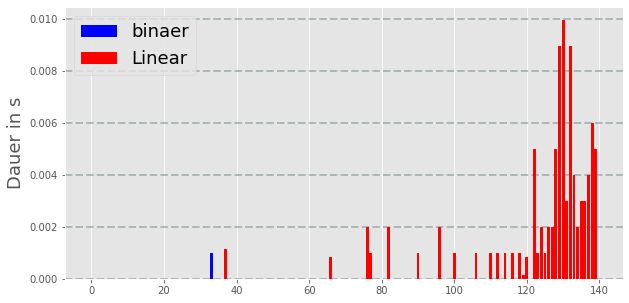

In [84]:
plt.figure (figsize=(10,5))
plt.bar([i for i in range(len(zeit_b))],zeit_b, color='b', label='binaer')
plt.bar([i for i in range(len(zeit_liear))],zeit_liear, color='red', label='Linear')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylabel('Dauer in s',fontsize=18)
plt.legend(fontsize=18)
plt.legend(fontsize=18)
plt.show()